# Proyecto de predicción de fugas de clientes en compañía telefónica
### Script por Manuel Sánchez-Montañés

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import roc_curve, auc, confusion_matrix

%matplotlib inline

In [2]:
COLAB = True

In [3]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1cp7JqMR6-DPZ1NK7wNKpNm9pPlwAqmHG',
                                        dest_path='./fuga_clientes_empresa_telefonica_construccion.csv')
    gdd.download_file_from_google_drive(file_id='1VexP_jauoEugLruNM-HOCWkzNFox-Y1F',
                                        dest_path='./fuga_clientes_empresa_telefonica_explotacion.csv')

## **Funciones auxiliares**

In [4]:
def analisis_roc(y_true, y_probas_predicted, POSITIVE_CLASS=1):
    s = y_probas_predicted.shape
    if len(s) == 1:
        positive_class_scores = y_probas_predicted
    elif len(s) == 2 and s[1] == 1:
        positive_class_scores = y_probas_predicted[:,0]
    else:
        positive_class_scores  = y_probas_predicted[:,POSITIVE_CLASS]

    fpr, tpr, thresholds = roc_curve(y_true,
                                     positive_class_scores,
                                     pos_label=POSITIVE_CLASS)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC. Positive class: '+str(POSITIVE_CLASS))
    plt.legend(loc="lower right");


def plot_confusion_matrix(y_true, y_predicted,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_predicted)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    classes = np.unique(y_test)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout();

In [5]:
df = pd.read_csv("./fuga_clientes_empresa_telefonica_construccion.csv")

In [10]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df[:5].T

,0,1,2,3,4
Customer ID,ADF0039,ADF0041,ADF0051,ADF0059,ADF0060
network_age,123,1316,2385,1614,2175
Customer tenure in month,4.1,43.87,79.5,53.8,72.5
Total Spend in Months 1 and 2 of 2017,76.714,98.8904,372.63,530.2,554.13
Total SMS Spend,0.0,4.14,3.51,6.85,6.99
Total Data Spend,1.25,1.25,1.25,1.25,153.75
Total Data Consumption,1.4951,1.0244,6.0898,3.3447,673204.0342
Total Unique Calls,14,27,119,69,33
Total Onnet spend,564,1626,10411,6822,3387
Total Offnet spend,6408,4373,22039,6274,7241


In [13]:
print(df.shape)
df.describe().T[["count", "min", "max", "mean", "std"]]

(1110, 25)


,count,min,max,mean,std
network_age,1110.0,-5.0000,5451.00,1.512039e+03,1.272024e+03
Customer tenure in month,1110.0,-0.1700,181.70,5.040138e+01,4.240068e+01
Total Spend in Months 1 and 2 of 2017,1110.0,4.9100,24438.83,8.350399e+02,1.317851e+03
Total SMS Spend,1110.0,0.0000,665.00,3.068709e+01,5.862510e+01
Total Data Spend,1110.0,0.0000,8295.00,6.716291e+01,3.237141e+02
Total Data Consumption,1110.0,0.0586,99456402.05,2.343397e+06,7.343873e+06
Total Unique Calls,1110.0,1.0000,2184.00,2.030432e+02,3.002578e+02
Total Onnet spend,1110.0,0.0000,146344.00,6.066100e+03,1.196962e+04
Total Offnet spend,1110.0,0.0000,384648.00,1.627347e+04,3.723065e+04
Total Call centre complaint calls,1110.0,1.0000,49.00,1.986486e+00,2.497392e+00


In [14]:
df.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Churn Status',
       'Most Loved Competitor network in in Month 1_0',
       'Most Loved Competitor network in in Month 1_Mango',
       'Most Loved Competitor network in in Month 1_PQza',
       'Most Loved Competitor network in in Month 1_ToCall',
       'Most Loved Competitor network in in Month 1_Uxaa',
       'Most Loved Competitor network in in Month 1_Weematel',
       'Most Loved Competitor network in in Month 1_Zintel',
       'Most Loved Competitor network in in Month 2_Mango',
       'Most Loved Competitor network in in Month 2_PQza',
       'Most Loved Competitor network in in Month 2_ToCall',
       'Most Loved Competitor network in in Month 2_Uxaa',
       'Most Loved Compet

In [15]:
df.isnull().sum()

Customer ID                                             0
network_age                                             0
Customer tenure in month                                0
Total Spend in Months 1 and 2 of 2017                   0
Total SMS Spend                                         0
Total Data Spend                                        0
Total Data Consumption                                  0
Total Unique Calls                                      0
Total Onnet spend                                       0
Total Offnet spend                                      0
Total Call centre complaint calls                       0
Churn Status                                            0
Most Loved Competitor network in in Month 1_0           0
Most Loved Competitor network in in Month 1_Mango       0
Most Loved Competitor network in in Month 1_PQza        0
Most Loved Competitor network in in Month 1_ToCall      0
Most Loved Competitor network in in Month 1_Uxaa        0
Most Loved Com

In [16]:
df_expl = pd.read_csv("./fuga_clientes_empresa_telefonica_explotacion.csv")
df_expl.isnull().sum()

Customer ID                                               0
network_age                                               0
Customer tenure in month                                  0
Total Spend in Months 1 and 2 of 2017                     0
Total SMS Spend                                           0
Total Data Spend                                          0
Total Data Consumption                                    0
Total Unique Calls                                        0
Total Onnet spend                                         0
Total Offnet spend                                        0
Total Call centre complaint calls                         0
Churn Status                                            289
Most Loved Competitor network in in Month 1_0             0
Most Loved Competitor network in in Month 1_Mango         0
Most Loved Competitor network in in Month 1_PQza          0
Most Loved Competitor network in in Month 1_ToCall        0
Most Loved Competitor network in in Mont

In [17]:
df.shape, df_expl.shape

((1110, 25), (289, 25))

### **Creación de variables sintéticas nuevas**

In [18]:
df["ratio"] = df["Total Unique Calls"] / df["Total Spend in Months 1 and 2 of 2017"]
df_expl["ratio"] = df_expl["Total Unique Calls"] / df_expl["Total Spend in Months 1 and 2 of 2017"]

df["ratio2"] = df["Total Call centre complaint calls"] / df["Total Unique Calls"]
df_expl["ratio2"] = df_expl["Total Call centre complaint calls"] / df_expl["Total Unique Calls"]

### **Chequeo que las columnas del dataset de construcción coinciden con las del dataset de explotación**

In [19]:
print(len(df.columns), len(df_expl.columns))
for n1,n2 in zip(df.columns,df_expl.columns):
    print(n1==n2)

27 27
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


## **Análisis exploratorio de datos**

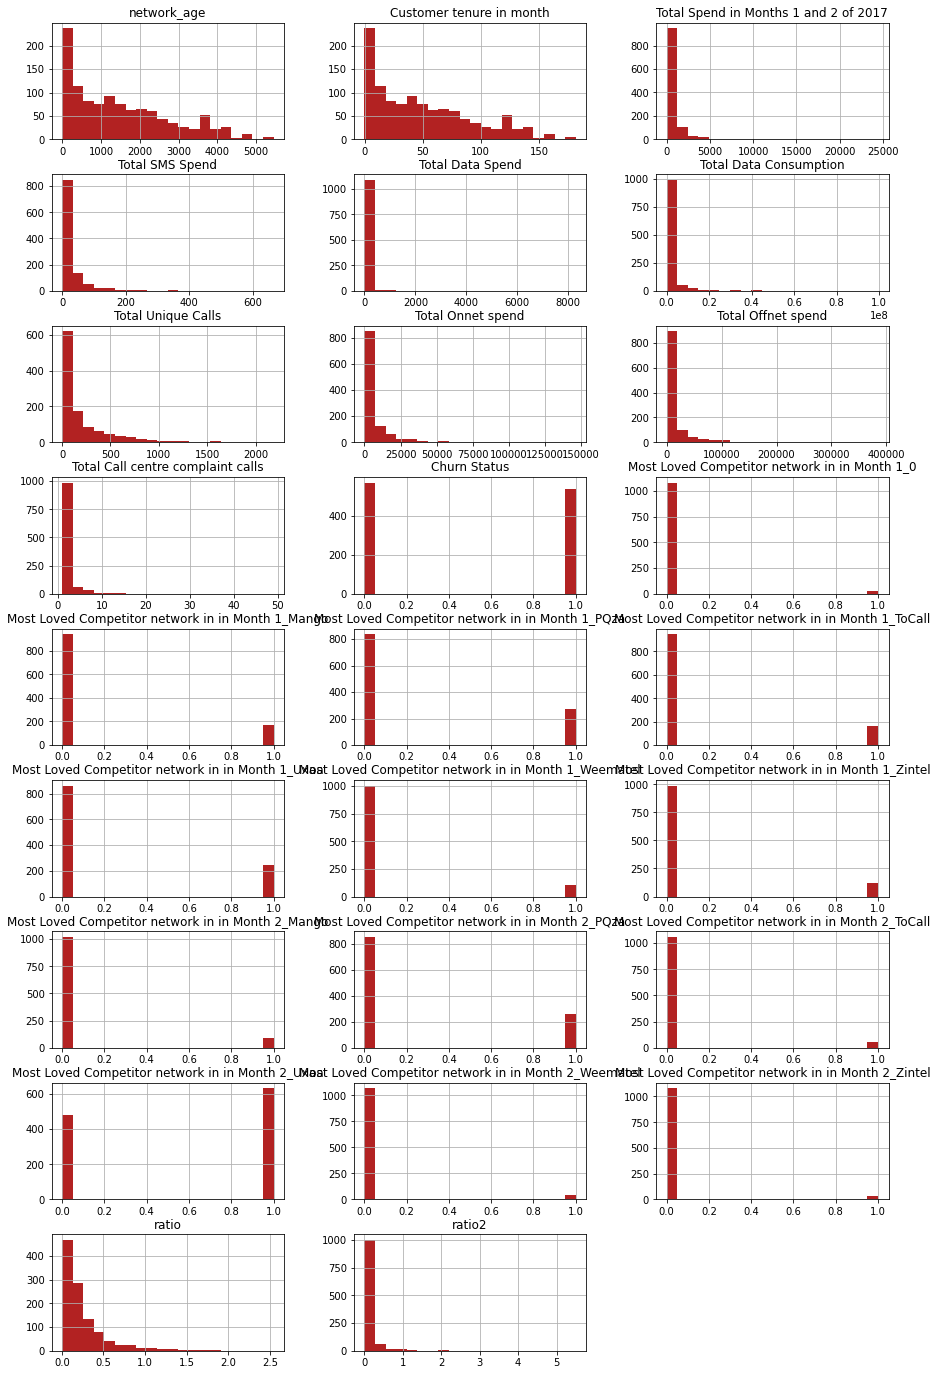

In [20]:
df.hist(color='firebrick', bins=20, layout=(11,3), figsize=(15,30));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

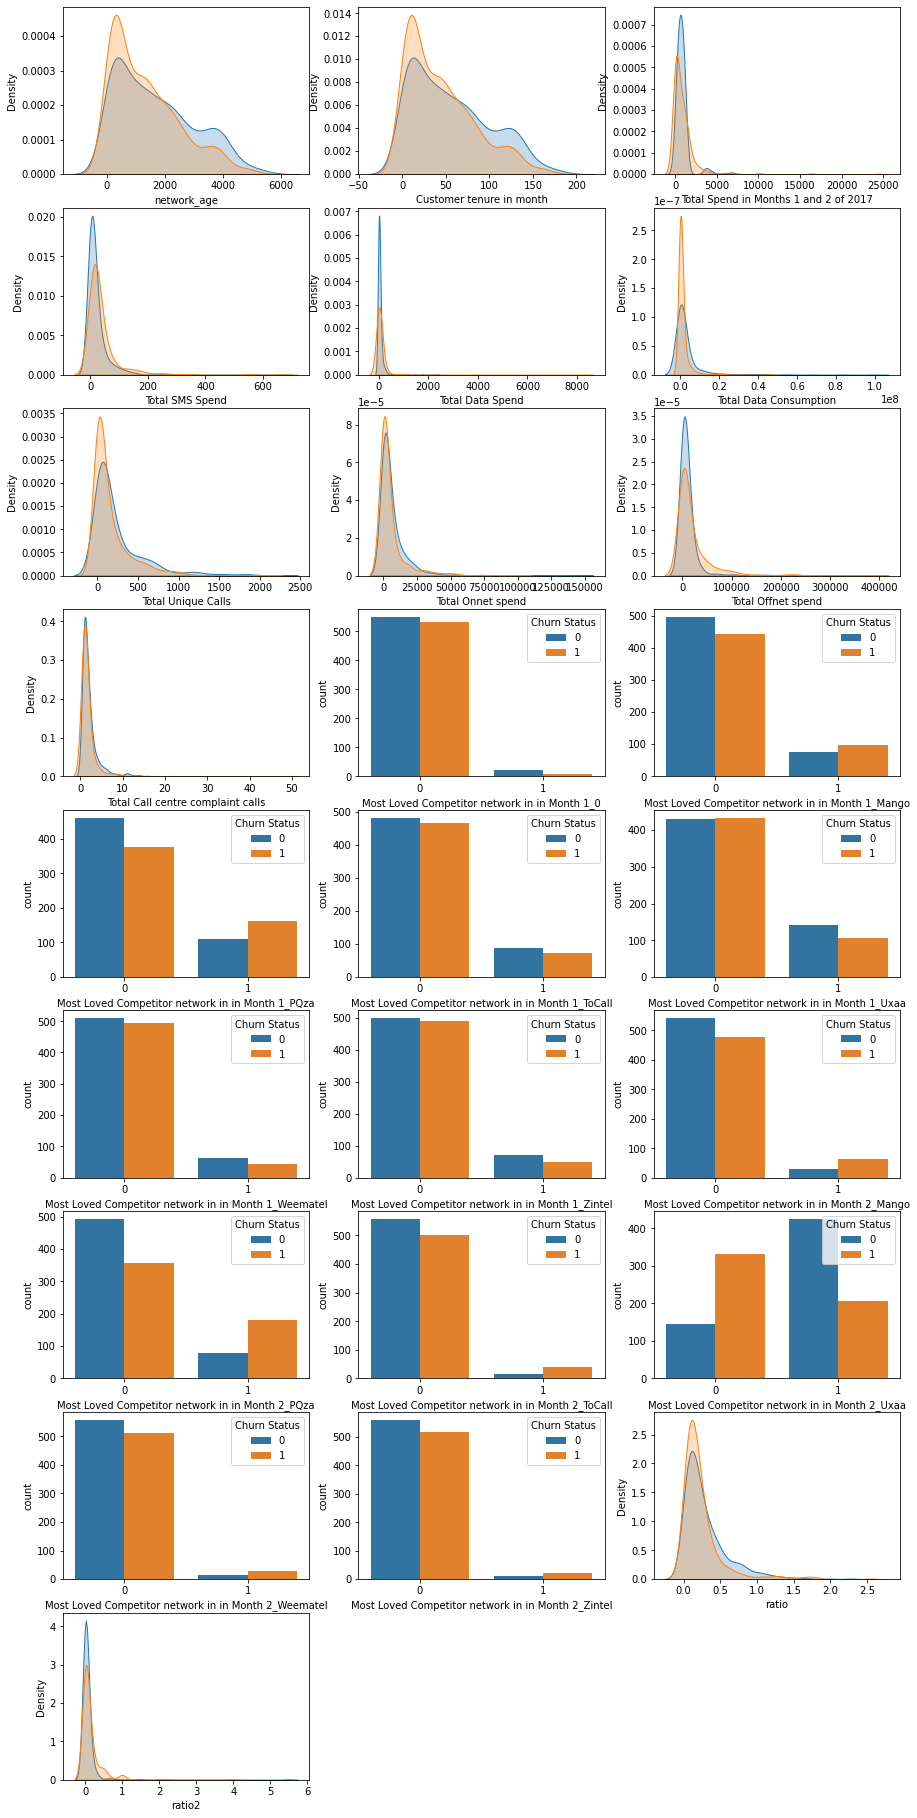

In [21]:
clases = np.unique(df["Churn Status"])
cols = list(df.columns)
cols.remove("Churn Status")
cols.remove("Customer ID")

plt.figure(figsize=(15,40))

for i,col in enumerate(cols):
    plt.subplot(11,3,i+1)
    if len(np.unique(df[col]))>2:
        for c in clases:
            sns.distplot(df[df["Churn Status"]==c][col], hist=False, kde=True,
                         kde_kws = {'shade': True, 'linewidth': 1}, 
                         label = c)
    else:
        sns.countplot(x=col, hue="Churn Status", data=df)

## **Construcción del modelo**

A tener en cuenta:

Funciones loss típicas en Keras en problemas de clasificación:

- **binary_crossentropy:** una única neurona de salida con activación **sigmoid**; la "y" es 0/1 (dos clases)
- **categorical_crossentropy:** N neuronas de salida para N clases, las neuronas de salida tienen activación **softmax**. La y está codificada en one-hot (tantas columnas como clases)
- **sparse_categorical_crossentropy:** N neuronas de salida para N clases, las neuronas de salida tienen activación **softmax**. La y es un entero que va de 0 a Nclases-1

In [23]:
df.head(5)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel,ratio,ratio2
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.182496,0.142857
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.273030,0.037037
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.319352,0.008403
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.130140,0.014493
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.059553,0.030303


In [25]:
len(df), df["Customer ID"].nunique()

(1110, 1110)

In [26]:
df.index

RangeIndex(start=0, stop=1110, step=1)

In [29]:
#df = df.set_index("Customer ID")
df.set_index("Customer ID", inplace=True)

In [30]:
df.head(5)

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in in Month 1_0,Most Loved Competitor network in in Month 1_Mango,Most Loved Competitor network in in Month 1_PQza,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel,ratio,ratio2
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,
ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.182496,0.142857
ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.273030,0.037037
ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.319352,0.008403
ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.130140,0.014493
ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.059553,0.030303


In [47]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=1,
                                     stratify=df["Churn Status"]
                                     )

In [48]:
df["Churn Status"].mean()

0.48558558558558557

In [49]:
df_train["Churn Status"].mean(), df_test["Churn Status"].mean()

(0.4851994851994852, 0.4864864864864865)

In [52]:
X_train = df_train.drop("Churn Status", axis=1)
X_test  = df_test.drop("Churn Status", axis=1)
y_train = df_train["Churn Status"]
y_test  = df_test["Churn Status"]

In [53]:
X_train.std()

network_age                                             1.292440e+03
Customer tenure in month                                4.308123e+01
Total Spend in Months 1 and 2 of 2017                   1.441820e+03
Total SMS Spend                                         6.136404e+01
Total Data Spend                                        3.698406e+02
Total Data Consumption                                  6.914502e+06
Total Unique Calls                                      3.070559e+02
Total Onnet spend                                       1.281765e+04
Total Offnet spend                                      3.972116e+04
Total Call centre complaint calls                       2.101475e+00
Most Loved Competitor network in in Month 1_0           1.765784e-01
Most Loved Competitor network in in Month 1_Mango       3.475042e-01
Most Loved Competitor network in in Month 1_PQza        4.323582e-01
Most Loved Competitor network in in Month 1_ToCall      3.566058e-01
Most Loved Competitor network in i

In [57]:
from sklearn.preprocessing import StandardScaler

aux = (df_train["network_age"] - df_train["network_age"].mean()) / df_train["network_age"].std()

In [58]:
aux.mean(), aux.std()

(-7.33718820006458e-17, 0.9999999999999999)

In [61]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc  = scaler.transform(X_test)

In [66]:
X_train_sc.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [67]:
X_train_sc.mean(axis=0)

array([-6.17266855e-17,  2.18329573e-16,  1.25739545e-16,  3.48641465e-17,
        0.00000000e+00,  2.57194523e-17, -3.08633428e-17, -9.14469415e-18,
        1.14308677e-17,  2.28617354e-17, -6.85852062e-18, -4.34372972e-17,
       -4.57234708e-17,  6.28697723e-18,  4.57234708e-17,  6.62990326e-17,
        4.11511237e-17, -7.31575532e-17, -9.14469415e-18,  7.31575532e-17,
       -2.28617354e-17, -4.34372972e-17, -4.34372972e-17, -2.01183271e-16,
       -2.51479089e-17])

In [68]:
X_train_sc.shape

(777, 25)

In [173]:
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1

ncols = X_train_sc.shape[1]
model = Sequential()
model.add(Dense(5, input_shape=(ncols,), activation='relu', kernel_regularizer=L1(0.05),
                name="Capa_oculta"))
model.add(Dense(1, activation='sigmoid', name="Capa_salida"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics="accuracy")

In [174]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_oculta (Dense)         (None, 5)                 130       
                                                                 
 Capa_salida (Dense)         (None, 1)                 6         
                                                                 
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [175]:
model.get_weights()

[array([[ 0.00927076,  0.16632295, -0.30119538, -0.23702404, -0.06345078],
        [ 0.08831251, -0.00646856,  0.2014221 , -0.19109008,  0.41212225],
        [-0.00776371,  0.33840656, -0.15441984,  0.03308329, -0.38233   ],
        [ 0.36311132, -0.40664998, -0.02414671,  0.014384  ,  0.13956422],
        [-0.18704572, -0.25097847,  0.00197425,  0.2952562 ,  0.10445625],
        [-0.22173735, -0.05512527, -0.31484637, -0.40876615, -0.16476995],
        [-0.18772364,  0.06355113, -0.16764838, -0.07412651, -0.29793003],
        [-0.3703158 ,  0.44606632, -0.00044686, -0.30864882, -0.17052028],
        [ 0.35644168,  0.0454565 , -0.36415336, -0.2856301 ,  0.3514704 ],
        [-0.3280076 , -0.20266573,  0.36863637, -0.0667184 , -0.3333035 ],
        [-0.19958185,  0.10351884, -0.17638057, -0.36141738, -0.16030455],
        [-0.13708258, -0.18982586, -0.2792125 ,  0.02474061,  0.29228002],
        [-0.37937555,  0.19811308, -0.10709125,  0.44337296,  0.27762604],
        [ 0.00893873, -0.

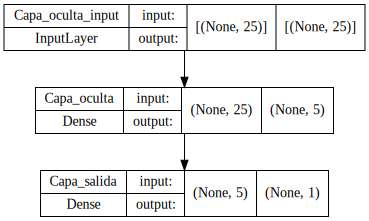

In [176]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

if COLAB:
    display(SVG(model_to_dot(model, show_shapes=True,dpi=72).create(prog='dot', format='svg')))
else:
    display(SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')))

In [177]:
#model.fit(X_train_sc, y_train, epochs=100)

In [178]:
from matplotlib.ticker import MaxNLocator

def grafica_entrenamiento(tr_acc, val_acc, tr_loss, val_loss, best_i,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.plot(1+best_i, 100*val_acc[best_i], 'or')
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_acc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_acc)), np.array(val_loss))
    plt.plot(1+best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [179]:
from keras.callbacks import ModelCheckpoint

acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

epochs = 50

modelpath="best_model.h5"

checkpoint = ModelCheckpoint(modelpath, monitor='val_accuracy', verbose=1,
                             save_best_only=True,
                             mode='max') # graba sólo los que mejoran en validación
callbacks_list = [checkpoint]

In [180]:
X_train.shape

(777, 25)

In [181]:
0.3*777

233.1

In [182]:
X_val = X_train_sc[-200:]
y_val = y_train[-200:]
X_tr  = X_train_sc[:-200]
y_tr  = y_train[:-200]

In [183]:
from IPython.display import clear_output

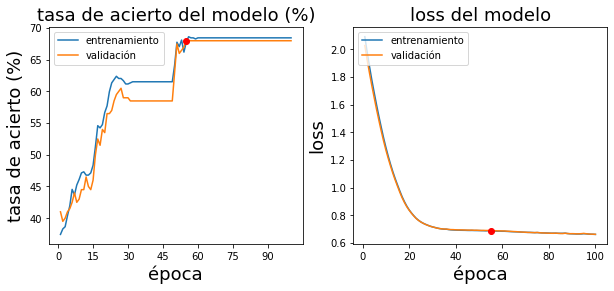

In [185]:
for e in range(epochs):
    history = model.fit(X_tr, y_tr, epochs=1, batch_size=32, callbacks=callbacks_list,
                        verbose=10, validation_data=(X_val,y_val))
    
    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
            best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]
    
    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])
    
    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

In [186]:
model.get_weights()

[array([[-6.37639241e-05, -9.30057577e-05, -1.41939754e-03,
         -2.60624016e-04,  5.97890234e-04],
        [ 2.84893977e-05, -6.76651835e-05, -1.66088622e-03,
         -2.16978573e-04,  1.79573824e-03],
        [-9.23578409e-05, -8.61424924e-05, -8.78866878e-04,
          1.18404467e-04,  2.34924722e-04],
        [-5.41923582e-05, -3.14171193e-05,  1.29479507e-03,
          8.38575070e-05, -1.45943207e-03],
        [-7.70849947e-05,  8.24265881e-05, -3.72205221e-04,
          1.31895620e-04,  1.62449491e-04],
        [-9.61868791e-05,  1.11254296e-04, -1.61922409e-03,
         -4.47472994e-05,  4.51647647e-04],
        [ 2.26069853e-04,  1.56947601e-04, -6.13150303e-04,
          6.01155698e-05, -5.62329260e-05],
        [ 1.64375524e-06,  1.59761010e-04,  4.82544885e-04,
         -2.40384747e-04,  4.79355600e-04],
        [-2.42500391e-05, -3.81422797e-05, -7.56861700e-05,
          2.51960537e-05, -1.40153832e-04],
        [ 3.06083239e-05, -4.52852219e-05, -4.47002123e-04,
    

In [187]:
modelpath

'best_model.h5'

In [188]:
from keras.models import load_model

model = load_model(modelpath)

In [193]:
np.round(model.predict(X_tr))[:10]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [194]:
y_tr[:10]

Customer ID
ADF0115    1
ADF1970    0
ADF0599    0
ADF1444    0
ADF1961    0
ADF1054    0
ADF1538    0
ADF0497    1
ADF1241    0
ADF1302    0
Name: Churn Status, dtype: int64